In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ruta al dataset externo
ruta_datos = "/home/samuel/Documentos/datos/Watch_accelerometer.csv"

# Cargar el dataset
df = pd.read_csv(ruta_datos)
df.head()


,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696638740,27920678471000,-0.565032,-9.572019,-0.614113,a,gear,gear_1,stand
1,1,1424696638740,27920681910000,-0.832584,-9.713276,-0.606930,a,gear,gear_1,stand
2,2,1424696638740,27920692014000,-1.018134,-9.935339,-0.544082,a,gear,gear_1,stand
3,3,1424696638741,27920701983000,-1.222838,-10.142437,-0.566229,a,gear,gear_1,stand
4,4,1424696638741,27920711906000,-1.577180,-10.480618,-0.402824,a,gear,gear_1,stand


In [2]:
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nResumen estadístico:")
df.describe()


Dimensiones del dataset: (3540962, 10)

Tipos de datos:
Index              int64
Arrival_Time       int64
Creation_Time      int64
x                float64
y                float64
z                float64
User              object
Model             object
Device            object
gt                object
dtype: object

Valores nulos por columna:
Index                 0
Arrival_Time          0
Creation_Time         0
x                     0
y                     0
z                     0
User                  0
Model                 0
Device                0
gt               520357
dtype: int64

Resumen estadístico:


,Index,Arrival_Time,Creation_Time,x,y,z
count,3.540962e+06,3.540962e+06,3.540962e+06,3.540962e+06,3.540962e+06,3.540962e+06
mean,1.579309e+05,1.424751e+12,2.207217e+14,-4.817605e-01,-2.502070e+00,1.936965e+00
std,1.320042e+05,4.284534e+07,9.507786e+13,8.125655e+00,4.781838e+00,3.358283e+00
min,0.000000e+00,1.424687e+12,2.026016e+11,-1.966953e+01,-1.970340e+01,-1.961330e+01
25%,3.594700e+04,1.424697e+12,2.054274e+14,-8.055740e+00,-5.356903e+00,3.952026e-03
50%,1.217325e+05,1.424780e+12,2.165193e+14,5.991490e-01,-3.252655e+00,1.643433e+00
75%,2.692728e+05,1.424786e+12,2.959673e+14,7.123337e+00,-7.413635e-01,4.207809e+00
max,4.594450e+05,1.424789e+12,3.006436e+14,1.961270e+01,1.961270e+01,1.992706e+01


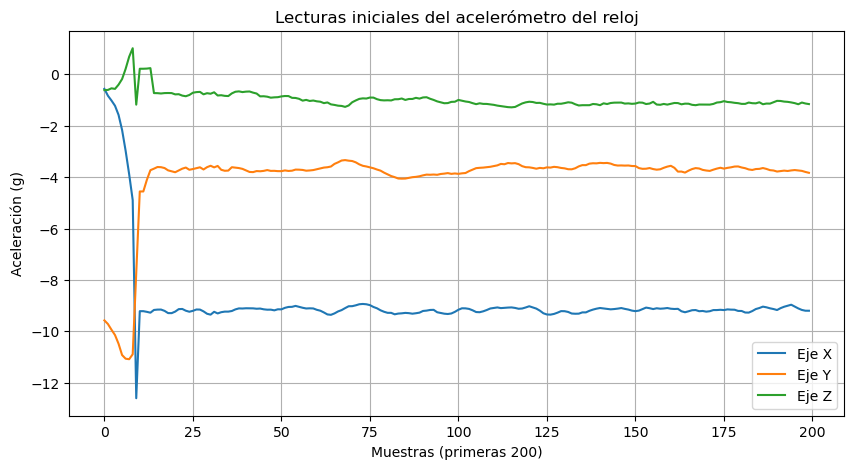

In [3]:
plt.figure(figsize=(10,5))
plt.plot(df['x'][:200], label='Eje X')
plt.plot(df['y'][:200], label='Eje Y')
plt.plot(df['z'][:200], label='Eje Z')
plt.title("Lecturas iniciales del acelerómetro del reloj")
plt.xlabel("Muestras (primeras 200)")
plt.ylabel("Aceleración (g)")
plt.legend()
plt.grid(True)
plt.show()


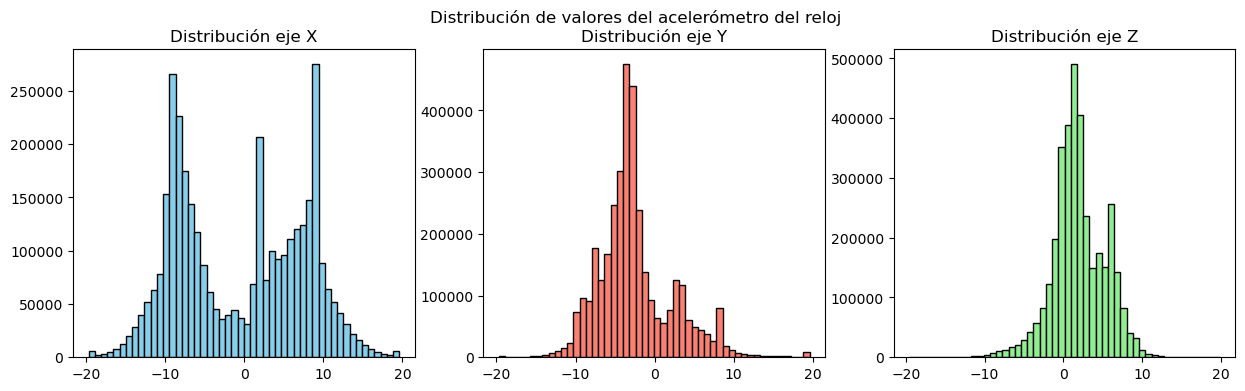

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].hist(df['x'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Distribución eje X')

axes[1].hist(df['y'], bins=50, color='salmon', edgecolor='black')
axes[1].set_title('Distribución eje Y')

axes[2].hist(df['z'], bins=50, color='lightgreen', edgecolor='black')
axes[2].set_title('Distribución eje Z')

plt.suptitle('Distribución de valores del acelerómetro del reloj')
plt.show()


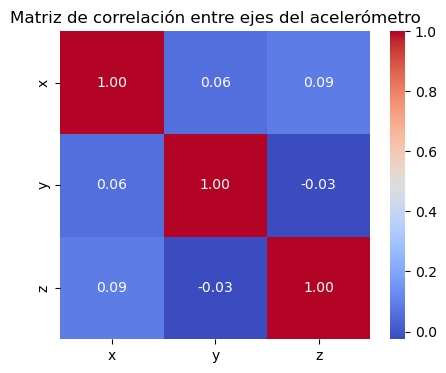

In [5]:
corr = df[['x', 'y', 'z']].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre ejes del acelerómetro")
plt.show()


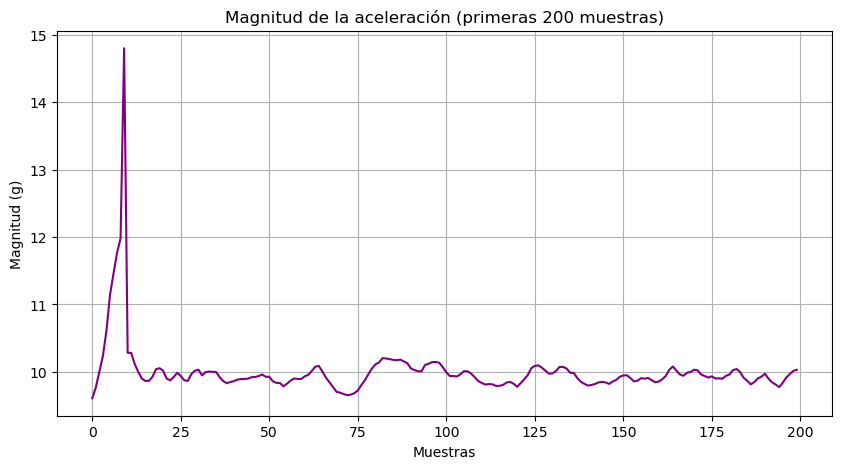

count    3.540962e+06
mean     1.020972e+01
std      2.485198e+00
min      1.751689e-01
25%      9.156471e+00
50%      9.926422e+00
75%      1.095595e+01
max      3.417581e+01
Name: magnitude, dtype: float64

In [6]:
import numpy as np

df['magnitude'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

plt.figure(figsize=(10,5))
plt.plot(df['magnitude'][:200], color='purple')
plt.title("Magnitud de la aceleración (primeras 200 muestras)")
plt.xlabel("Muestras")
plt.ylabel("Magnitud (g)")
plt.grid(True)
plt.show()

df['magnitude'].describe()


In [7]:
df.groupby('gt')[['x', 'y', 'z', 'magnitude']].mean()


,x,y,z,magnitude
gt,,,,
bike,-1.803119,-1.947162,4.590256,10.237393
sit,0.324850,-4.766640,3.917400,9.870222
stairsdown,-0.607346,-1.976259,0.816490,10.401273
stairsup,-0.024106,-2.113122,0.868505,10.611104
stand,-0.357810,-2.287680,1.118905,9.842599
walk,-0.317929,-2.276931,0.707096,10.217377
